# 1 year atlas close look (let's look at 2022)

In [185]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, FFMpegWriter
import warnings
warnings.filterwarnings("ignore")


In [186]:


def compass(r,T,s):
    return r*np.exp(1j*2*np.pi*s/T)

def init_atlas(sx,sy):
    
    plt.figure(figsize=(sx,sy))



def see_atlas(atlas,symbol_size,symbol_shape):
    #plt.scatter(0,0,s=10,marker='*')
    plt.scatter(atlas.real,atlas.imag,s=symbol_size,marker=symbol_shape)


def color_atlas(atlas,symbol_size,symbol_shape,symbol_color,cmap,T_color):
    
    get_color =  cm.get_cmap(cmap, T_color)
    plt.scatter(atlas.real,atlas.imag,s=symbol_size,marker=symbol_shape,color=get_color(symbol_color%T_color))

def atlas_view(symbol,T_symbol,atlas,symbol_size,symbol_shape,symbol_color,cmap,T_color,char_flag,T_char,char_color,char_size,cmap_char):
    
    get_color =  cm.get_cmap(cmap, T_color)
    get_char_color = cm.get_cmap(cmap_char, T_char)
    plt.scatter(atlas.real,atlas.imag,s=symbol_size,marker=symbol_shape,color=get_color(symbol_color%T_color))
    if char_flag:
        plt.text(atlas.real,atlas.imag,str(symbol%T_symbol),size=char_size,color=get_char_color(char_color%T_symbol))


def create_random_climate_data(start,end,freq):
    dt_index = pd.date_range(start=start, end=end, freq=freq)

    # Create a dataframe with random temperature, humidity, and pressure data
    
    data = {'temperature': np.random.uniform(low=-60, high=60, size=len(dt_index)),
        'humidity': np.random.uniform(low=20, high=80, size=len(dt_index)),
        'pressure': np.random.uniform(low=980, high=1020, size=len(dt_index))}
        
    climate_data = pd.DataFrame(data=data, index=dt_index)
    
    return climate_data

    
def extract_climate_data(df):
    # Extract the datetime components as numpy arrays
    year = df.index.year.values
    month = df.index.month.values
    day = df.index.day.values
    hour = df.index.hour.values
    minute = df.index.minute.values
    second = df.index.second.values

    # Extract the data columns as numpy arrays
    temperature = df['temperature'].values
    humidity = df['humidity'].values
    pressure = df['pressure'].values
    
    return year, month, day, hour, minute, second, temperature, humidity, pressure

def month_range(year, month):
    if month == 2 and calendar.isleap(year):
        return 29
    return calendar.monthrange(year, month)[1]


def compass_signed(r,T_pos,T_neg,s):
    # if s will have negative values: 
    #       positive values will range from [0,pi-
    #       negative values will range from [-pi,]

   return r*np.exp(1j*(np.pi/T_pos)*s) 

def get_colors(sequence,cmap):
    
    markers = ['o' if t >= 0 else 'D' for t in sequence]
    norm = plt.Normalize(min(sequence), max(sequence))
    colors = [cmap(norm(value)) for value in sequence]
    norm_seq =norm(sequence)
    return  markers,norm,colors,norm_seq


In [187]:

plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "white",
        "text.color": "white",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "gray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})




In [188]:

# Example use
start = pd.Timestamp('2023-01-01 00:00:00')
end = pd.Timestamp('2023-01-31 23:00:00')
freq ='H'
df  = create_random_climate_data(start,end,freq)
year, month, day, hour, minute, second, temperature, humidity, pressure = extract_climate_data(df)

# Main index
n = np.arange(len(df.index))


# Structural index
year_clk    =   compass(r=(2)**(0),T=7,s=year)
month_clk   =   compass(r=(2)**(-2.3),T=12,s=month)
day_clk     =   compass(r=(2)**(-4.5),T=31,s=day)
hour_clk    =   compass(r=(2)**(-8),T=24,s=n)

#temp_symbol =   compass(r=1,T=)

smaller_clock = hour_clk
clk_0   =   smaller_clock
clk_1   =   day_clk
clk_2   =   month_clk
clk_3   =   year_clk


atlas = clk_0+clk_1+clk_2+clk_3



# Adapt the data to the time structure

Here are no general rules. You can use your compas however you like.
As we are testing with climate data, and with possitive and negative numbers we have to adapt our data to our clocks structure.

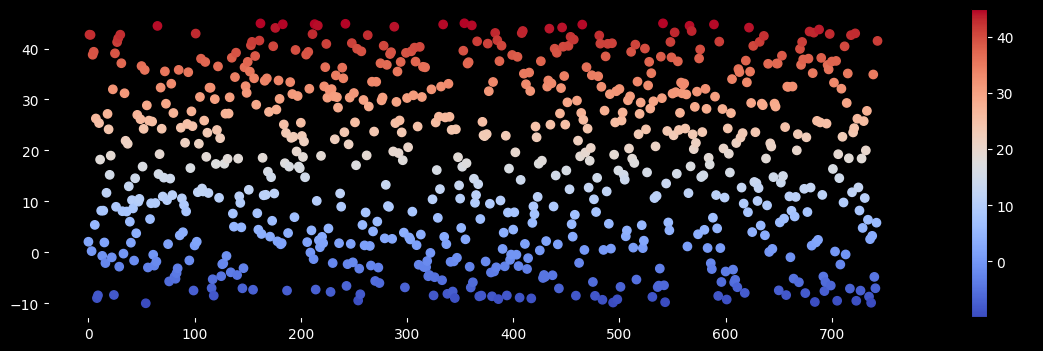

In [189]:
MAX=60
MIN=-60
K=3
n=n
seq_size=n.size
# sequence = np.arange(-60,61,0.5)
# sequence = np.random.randint(-60,61,300)
#sequence = np.random.rand(int(seq_size))*MAX + np.random.rand(seq_size)*MIN
sequence    = np.random.uniform(low=-10, high=45, size=seq_size)
cmap = plt.cm.coolwarm
norm = plt.Normalize(min(sequence), max(sequence))
colors = [cmap(norm(value)) for value in sequence]
init_atlas(14,4)

plt.scatter(np.arange(len(sequence)), sequence, color=colors)
#plt.plot(np.arange(len(sequence)), sequence)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label('Color for Positive and Negative Values')

plt.show()

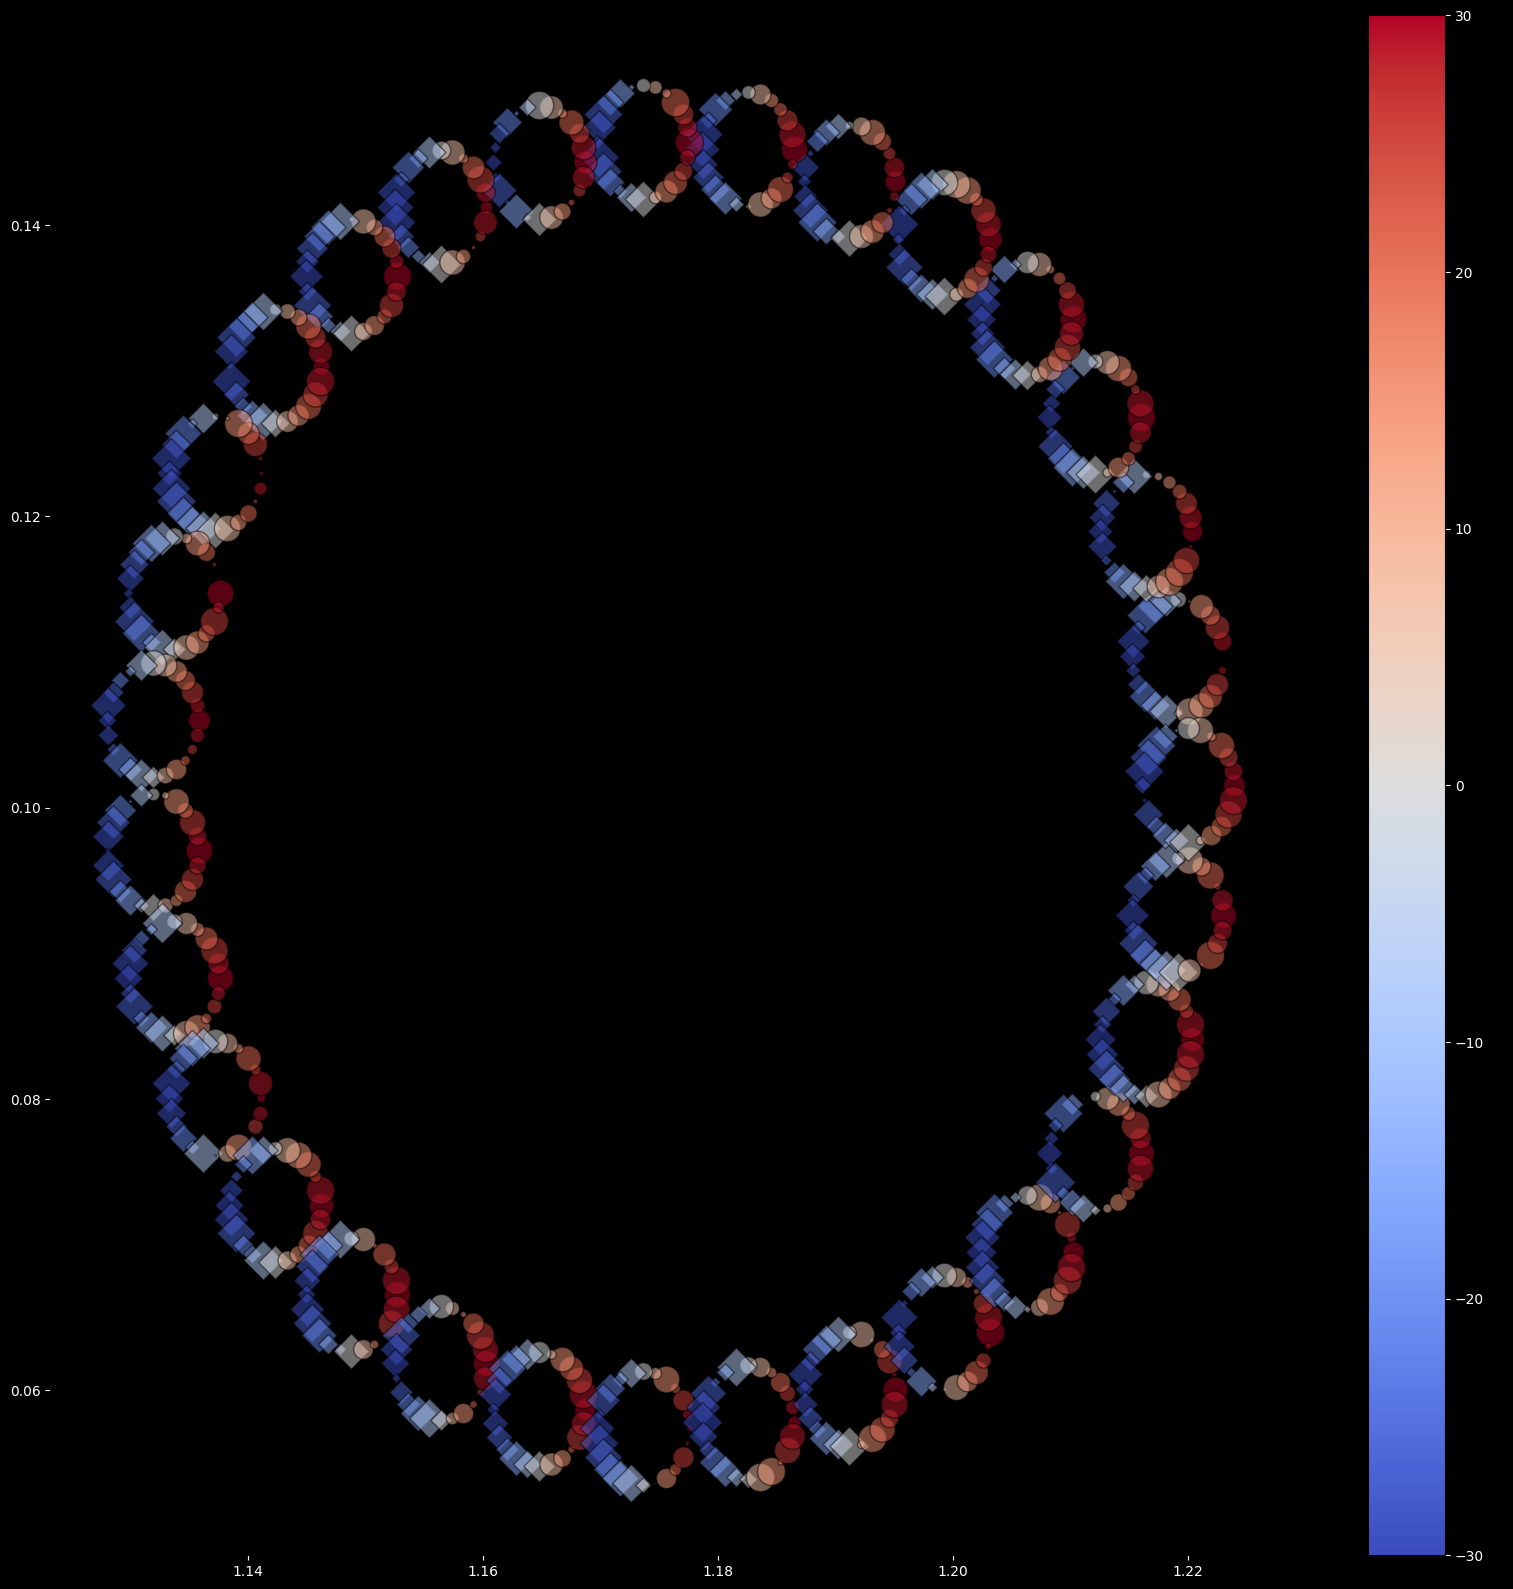

In [190]:
sequence    = temperature
sequence    =30*np.cos(2*np.pi/24*np.arange(len(temperature)))
cmap=plt.cm.coolwarm



markers,norm,colors,norm_seq =get_colors(sequence,cmap)





init_atlas(20,20)
## IMPORTANTE PARA MOSTRAR EN EL TAMAÑO EL VALOR ABSOLUTO DEL DELTA
#plt.scatter(atlas.real,atlas.imag, color=colors,s=0.1*np.abs(temperature))
#plt.scatter(atlas.real,atlas.imag, color=colors,s=100*np.abs(temperature),marker=markers)

for i in range(len(atlas)):
    plt.scatter(atlas[i].real, atlas[i].imag, color=colors[i], s=7*np.abs(temperature[i]), marker=markers[i], facecolor=colors[i], edgecolors='black', alpha=0.5)


cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label('Color for Positive and Negative Values')

plt.show()

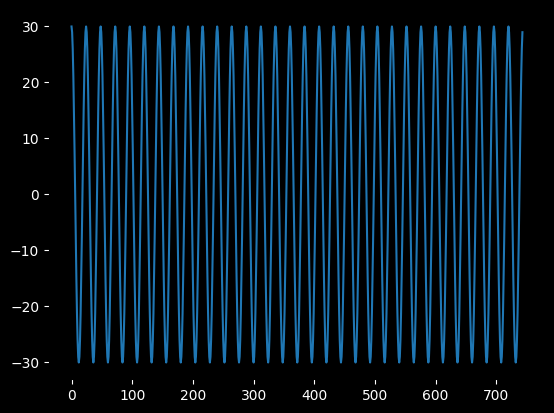

In [191]:
plt.plot(sequence)

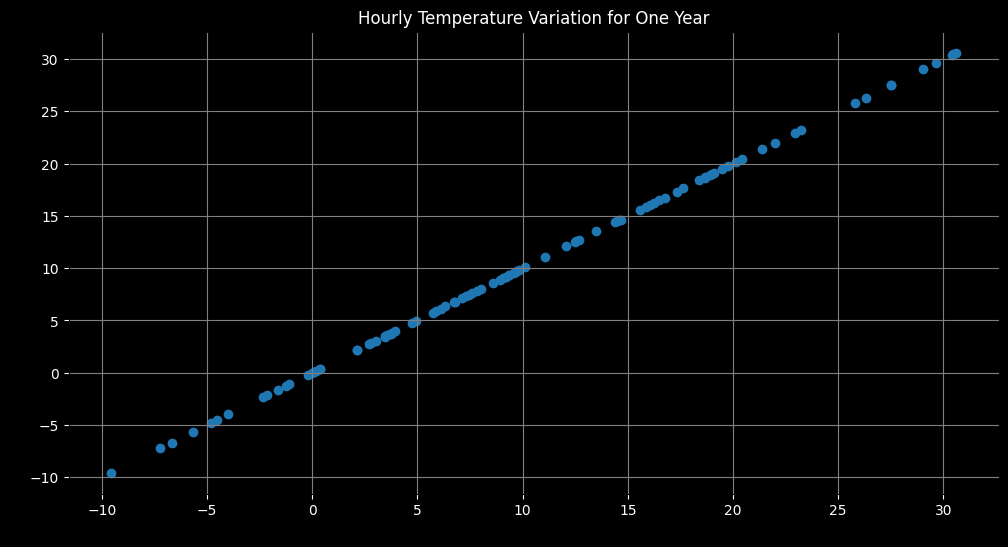

In [192]:
import numpy as np
import matplotlib.pyplot as plt

# Define the seasons and their corresponding average temperatures
seasons = {
    'Winter': (-10, 10),
    'Spring': (-2, 20),
    'Summer': (8, 34),
    'Autumn': (-1, 20)
}

# Define the number of days and hours in a year
num_days = 1
num_hours = 24

# Generate temperature data for each season
temperature_data = []
for season in seasons:
    temp_min, temp_max = seasons[season]
    temps = np.random.uniform(temp_min, temp_max, size=(num_days, num_hours))
    temperature_data.append(temps)

# Concatenate the temperature data for all seasons
temperature_data = np.concatenate(temperature_data)

# Plot the temperature data for one year
plt.figure(figsize=(12, 6))
#plt.plot(temperature_data[:num_days*num_hours])
plt.scatter(temperature_data,temperature_data)

plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Hourly Temperature Variation for One Year')
plt.grid(True)
plt.show()


In [193]:
print(temperature_data)

[[ 9.84104383e+00 -5.65918964e+00  6.75705315e+00  9.87248002e-02
  -4.53933136e+00  4.76355972e+00 -2.35127567e+00  7.43620485e+00
  -1.64383812e+00 -9.57333270e+00 -3.98714445e+00  3.94176817e+00
   3.57559541e+00 -7.23004246e+00  2.80475836e+00  1.69918236e-01
  -4.80217529e+00  6.11616002e+00  3.46906429e+00  3.77426681e+00
  -6.68383635e+00 -2.14948531e+00  9.08475176e+00 -1.26874638e+00]
 [ 1.73195179e+01  1.45617209e+01  3.68641754e+00  4.93334828e+00
   1.76328557e+01  6.33239005e+00  7.11124630e+00  3.72574912e+00
   2.13304333e+00  3.43701946e+00  1.94840871e+01  1.97819719e+01
   8.90845631e+00 -1.86041635e-02  6.77339138e+00  1.90990897e+01
   1.64731269e+01  1.84065259e+01 -1.11661017e+00  1.90192783e+01
   3.62702301e-01  1.86891883e+01  9.61645325e+00  7.31146109e+00]
 [ 1.24752796e+01  1.43913127e+01  9.57066447e+00  3.04112125e+01
   2.32524084e+01  1.55723520e+01  8.04233774e+00  3.04669983e+01
   2.75017606e+01  2.04152284e+01  9.35054860e+00  2.20099230e+01
   2.135

In [194]:
sequence

array([ 3.00000000e+01,  2.89777748e+01,  2.59807621e+01,  2.12132034e+01,
        1.50000000e+01,  7.76457135e+00,  1.83697020e-15, -7.76457135e+00,
       -1.50000000e+01, -2.12132034e+01, -2.59807621e+01, -2.89777748e+01,
       -3.00000000e+01, -2.89777748e+01, -2.59807621e+01, -2.12132034e+01,
       -1.50000000e+01, -7.76457135e+00, -5.51091060e-15,  7.76457135e+00,
        1.50000000e+01,  2.12132034e+01,  2.59807621e+01,  2.89777748e+01,
        3.00000000e+01,  2.89777748e+01,  2.59807621e+01,  2.12132034e+01,
        1.50000000e+01,  7.76457135e+00,  3.58302036e-14, -7.76457135e+00,
       -1.50000000e+01, -2.12132034e+01, -2.59807621e+01, -2.89777748e+01,
       -3.00000000e+01, -2.89777748e+01, -2.59807621e+01, -2.12132034e+01,
       -1.50000000e+01, -7.76457135e+00, -1.28587914e-14,  7.76457135e+00,
        1.50000000e+01,  2.12132034e+01,  2.59807621e+01,  2.89777748e+01,
        3.00000000e+01,  2.89777748e+01,  2.59807621e+01,  2.12132034e+01,
        1.50000000e+01,  

In [195]:
sequence.size

744

In [196]:
sequence

array([ 3.00000000e+01,  2.89777748e+01,  2.59807621e+01,  2.12132034e+01,
        1.50000000e+01,  7.76457135e+00,  1.83697020e-15, -7.76457135e+00,
       -1.50000000e+01, -2.12132034e+01, -2.59807621e+01, -2.89777748e+01,
       -3.00000000e+01, -2.89777748e+01, -2.59807621e+01, -2.12132034e+01,
       -1.50000000e+01, -7.76457135e+00, -5.51091060e-15,  7.76457135e+00,
        1.50000000e+01,  2.12132034e+01,  2.59807621e+01,  2.89777748e+01,
        3.00000000e+01,  2.89777748e+01,  2.59807621e+01,  2.12132034e+01,
        1.50000000e+01,  7.76457135e+00,  3.58302036e-14, -7.76457135e+00,
       -1.50000000e+01, -2.12132034e+01, -2.59807621e+01, -2.89777748e+01,
       -3.00000000e+01, -2.89777748e+01, -2.59807621e+01, -2.12132034e+01,
       -1.50000000e+01, -7.76457135e+00, -1.28587914e-14,  7.76457135e+00,
        1.50000000e+01,  2.12132034e+01,  2.59807621e+01,  2.89777748e+01,
        3.00000000e+01,  2.89777748e+01,  2.59807621e+01,  2.12132034e+01,
        1.50000000e+01,  

In [197]:
np.array(norm(sequence))

array([1.        , 0.98296291, 0.9330127 , 0.85355339, 0.75      ,
       0.62940952, 0.5       , 0.37059048, 0.25      , 0.14644661,
       0.0669873 , 0.01703709, 0.        , 0.01703709, 0.0669873 ,
       0.14644661, 0.25      , 0.37059048, 0.5       , 0.62940952,
       0.75      , 0.85355339, 0.9330127 , 0.98296291, 1.        ,
       0.98296291, 0.9330127 , 0.85355339, 0.75      , 0.62940952,
       0.5       , 0.37059048, 0.25      , 0.14644661, 0.0669873 ,
       0.01703709, 0.        , 0.01703709, 0.0669873 , 0.14644661,
       0.25      , 0.37059048, 0.5       , 0.62940952, 0.75      ,
       0.85355339, 0.9330127 , 0.98296291, 1.        , 0.98296291,
       0.9330127 , 0.85355339, 0.75      , 0.62940952, 0.5       ,
       0.37059048, 0.25      , 0.14644661, 0.0669873 , 0.01703709,
       0.        , 0.01703709, 0.0669873 , 0.14644661, 0.25      ,
       0.37059048, 0.5       , 0.62940952, 0.75      , 0.85355339,
       0.9330127 , 0.98296291, 1.        , 0.98296291, 0.93301

## Custom structure - a 360 days year simplification

If we didn't use the datetime structure from python, we could imagine we design our own calendar going from the most simple one to understand of one year of 360 days (to be 1 )

In [198]:
T_0=24
T_1=30
T_2=12
T_3=1
n=np.arange(T_0*T_1*T_2*T_3)
s_0=n
s_1=n%T_1
s_2=n%T_2
s_3=n%T_3
